# Importar bibliotecas

In [ ]:
import pandas as pd
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Inserir funções necessárias para o processamento dos dados

In [ ]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum(): #checar alfanumericos
            rem += i
        else:
            rem += ' '
    return rem

def to_lower(text):
    return text.lower()

def rem_stopwords(text):
  words = word_tokenize(text)
  return [w for w in words if w not in stopwords]

def unir(text):
    return ' '.join(w for w in text)


# Processamento dos dados

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/arturkamimura/sentimentos_dolar/main/compilado_noticias_dolar.csv')
df

,Textos,Var
0,A Bolsa de Valores brasileira encerrou a seman...,1
1,"A Bolsa de Valores brasileira caiu 3,05%, a 11...",1
2,"A China permitiu que o yuan, a moeda do país, ...",1
3,Pela primeira vez em 2022 a Bolsa de Valores b...,1
4,"A Bolsa de Valores e, principalmente, a moeda ...",1
...,...,...
1068,O dólar abriu com alta de mais de 1% ante o re...,1
1069,O dólar fechou em queda nesta terça-feira (15...,0
1070,O dólar fechou em baixa nesta quinta-feira (2...,0
1071,"O dólar fechou em alta de 1,55%, cotado a R$ ...",1


In [ ]:
funcoes = [is_special, to_lower, rem_stopwords, unir]
for funcao in funcoes:
  df.Textos = df.Textos.apply(funcao)
  print(df.Textos)

all_words_str = ' '.join(df.Textos)


0       A Bolsa de Valores brasileira encerrou a seman...
1       A Bolsa de Valores brasileira caiu 3 05   a 11...
2       A China permitiu que o yuan  a moeda do país  ...
3       Pela primeira vez em 2022 a Bolsa de Valores b...
4       A Bolsa de Valores e  principalmente  a moeda ...
                              ...                        
1068    O dólar abriu com alta de mais de 1  ante o re...
1069     O dólar fechou em queda nesta terça feira  15...
1070     O dólar fechou em baixa nesta quinta feira  2...
1071     O dólar fechou em alta de 1 55   cotado a R  ...
1072     O dólar bateu novo recorde nesta segunda feir...
Name: Textos, Length: 1073, dtype: object
0       a bolsa de valores brasileira encerrou a seman...
1       a bolsa de valores brasileira caiu 3 05   a 11...
2       a china permitiu que o yuan  a moeda do país  ...
3       pela primeira vez em 2022 a bolsa de valores b...
4       a bolsa de valores e  principalmente  a moeda ...
                              

# Plotar wordcloud com as palavras do dataframe a ser usado no treinamento

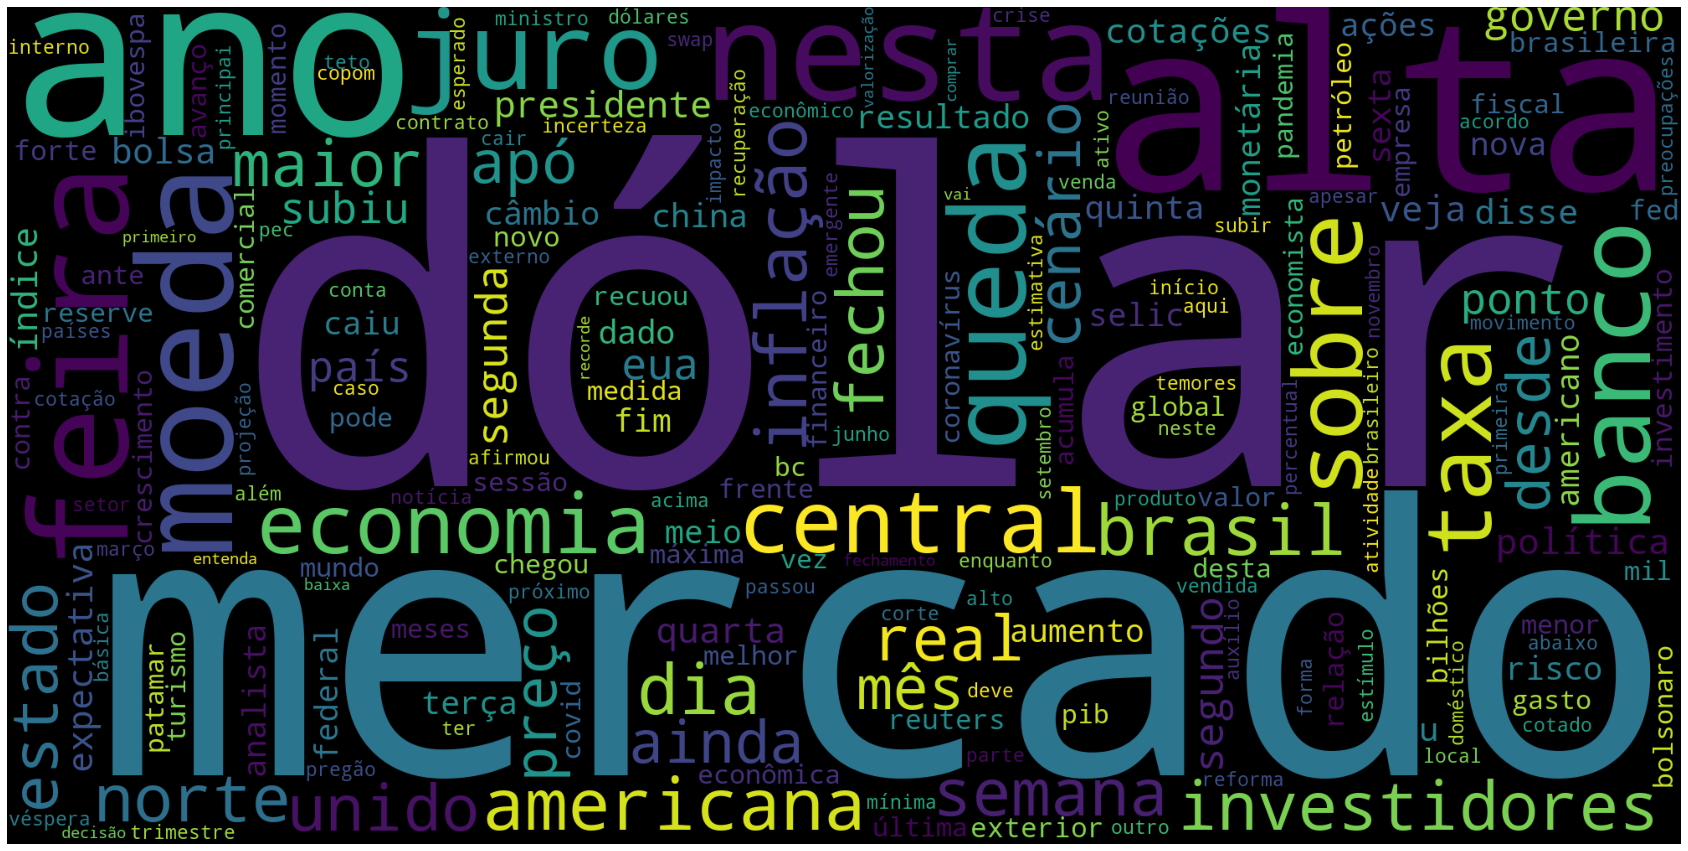

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis("off")
    #plt.savefig(f'teste.png')
    plt.show()
    plt.close()

wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)

plot_cloud(wordcloud)


# Início do treinamento

In [ ]:
y = np.array(df.Var.values)
cv = CountVectorizer()
X = cv.fit_transform(df.Textos).toarray()
trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Naive Bayes
gnb, mnb, bnb = GaussianNB(), MultinomialNB(alpha=1.0, fit_prior=True), BernoulliNB(alpha=1.0, fit_prior=True)

In [ ]:
#Random Forest
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
#Support vector machine (SVM)
svcl = svm.SVC(max_iter=2000)

In [ ]:
#fit models

#Naive Bayes
gnb.fit(trainx, trainy)
mnb.fit(trainx, trainy)
bnb.fit(trainx, trainy)

#Random Forest
text_classifier.fit(trainx, trainy)

#SVM
svcl.fit(trainx, trainy)


SVC(max_iter=2000)

#Predições

In [ ]:
#Naive Bayes
ypg = gnb.predict(testx)
ypm = mnb.predict(testx)
ypb = bnb.predict(testx)

#RandomForest
tes_c = text_classifier.predict(testx)

#SVM
test_svm = svcl.predict(testx)

In [ ]:
#Acurácias:
def acuracia (treino, estimativa):
  acc = f'{round(accuracy_score(treino, estimativa)*100,2)}%'
  return acc
  
(f'GNB:{acuracia(testy, ypg)}, MNB:{acuracia(testy, ypm)}, BNB:{acuracia(testy, ypb)}, '
      f'RandomForest:{acuracia(testy, tes_c)}, SVM:{acuracia(testy, test_svm)}')

'GNB:54.42%, MNB:59.07%, BNB:57.21%, RandomForest:65.58%, SVM:65.58%'